<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/VAR_Model_Sierra_Leone_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive

In [26]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
import pandas as pd

In [28]:
Data =pd.read_excel(r'/content/gdrive/My Drive/PhD Research Project/COVID-19SL.xlsx')

In [29]:
display(pd.DataFrame(Data))

,Day,Cases,Active,Death,Recovery,LnC,LnAC,LnD,LnR
0,2020-04-25,82,70,1,11,4.406719,4.248495,0.000000,2.397895
1,2020-04-26,93,79,4,10,4.532599,4.369448,1.386294,2.302585
2,2020-04-27,99,85,4,10,4.595120,4.442651,1.386294,2.302585
3,2020-04-28,104,88,4,12,4.644391,4.477337,1.386294,2.484907
4,2020-04-29,104,88,4,12,4.644391,4.477337,1.386294,2.484907
...,...,...,...,...,...,...,...,...,...
300,2021-02-19,3841,1165,79,2597,8.253488,7.060476,4.369448,7.862112
301,2021-02-20,3849,1167,79,2603,8.255569,7.062192,4.369448,7.864420
302,2021-02-21,3855,1169,79,2607,8.257126,7.063904,4.369448,7.865955
303,2021-02-22,3857,1169,79,2609,8.257645,7.063904,4.369448,7.866722


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from statsmodels.stats.diagnostic import linear_harvey_collier
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VARMAX
import warnings
warnings.filterwarnings("ignore")


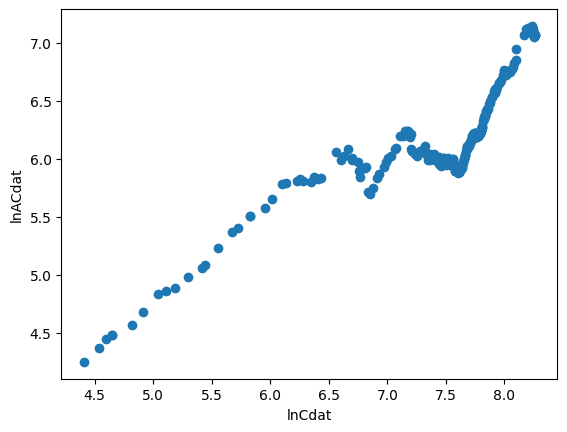

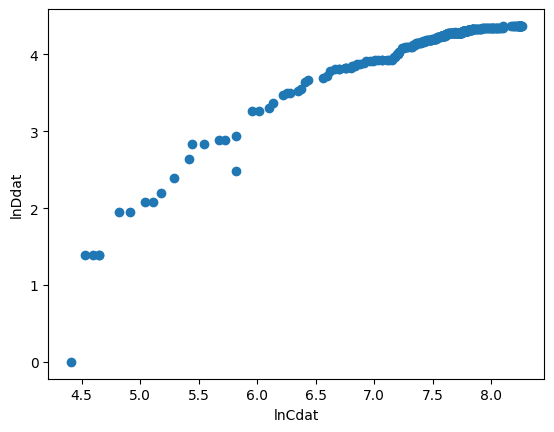

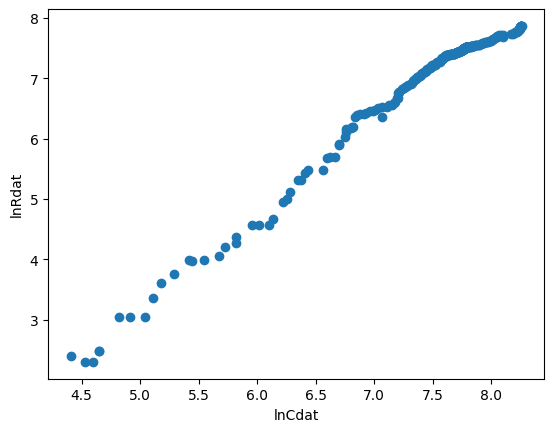

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 24, Feb, 2024
Time:                     15:16:46
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -28.6865
Nobs:                     302.000    HQIC:                  -29.0697
Log likelihood:           2766.05    FPE:                1.83761e-13
AIC:                     -29.3254    Det(Omega_mle):     1.55253e-13
--------------------------------------------------------------------
Results for equation Cases
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.135923         0.043450            3.128           0.002
L1.Cases            0.670107         0.101310            6.614           0.000
L1.Active           0.130578         0.039505            3.305      

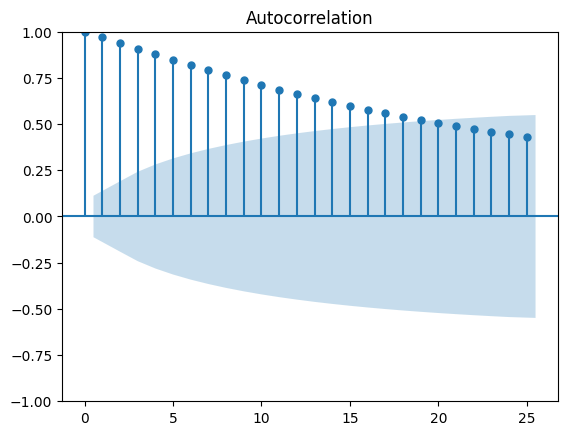

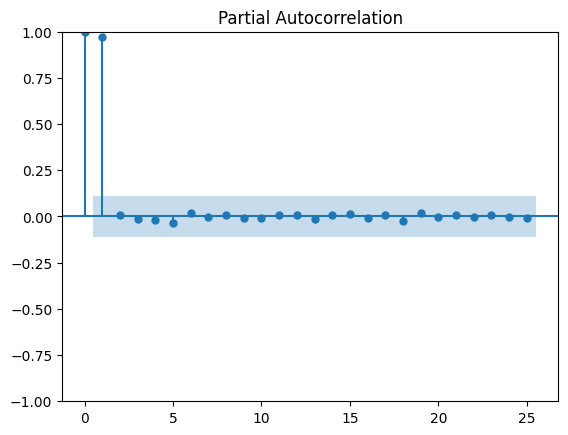

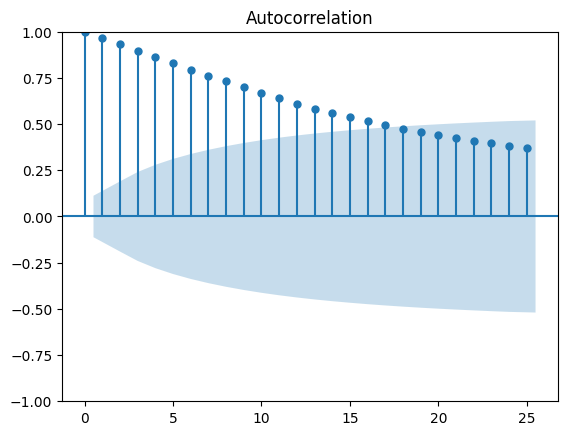

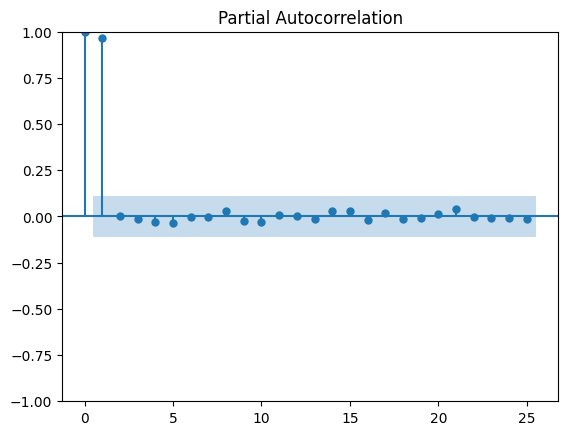

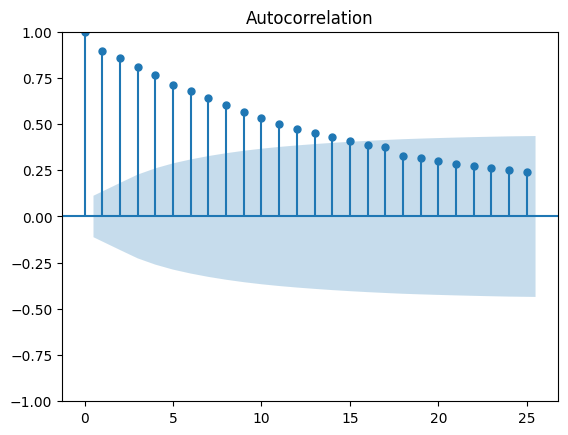

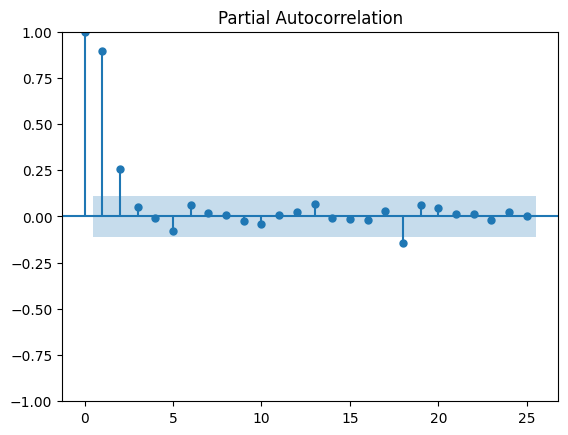

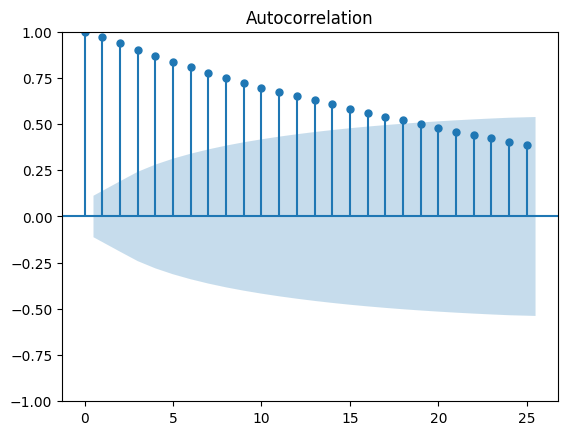

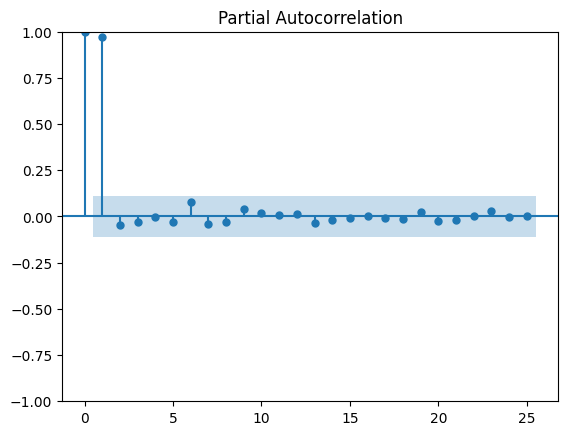

NormaltestResult(statistic=array([ 93.1960401 ,  77.13361446, 235.53799855, 160.7463247 ]), pvalue=array([5.79077946e-21, 1.78093650e-17, 7.13794956e-52, 1.24273663e-35]))
(0.6579671982013326, 0.7795700322826594, [(1, 1.63), (5, 1.36), (10, 1.22)])


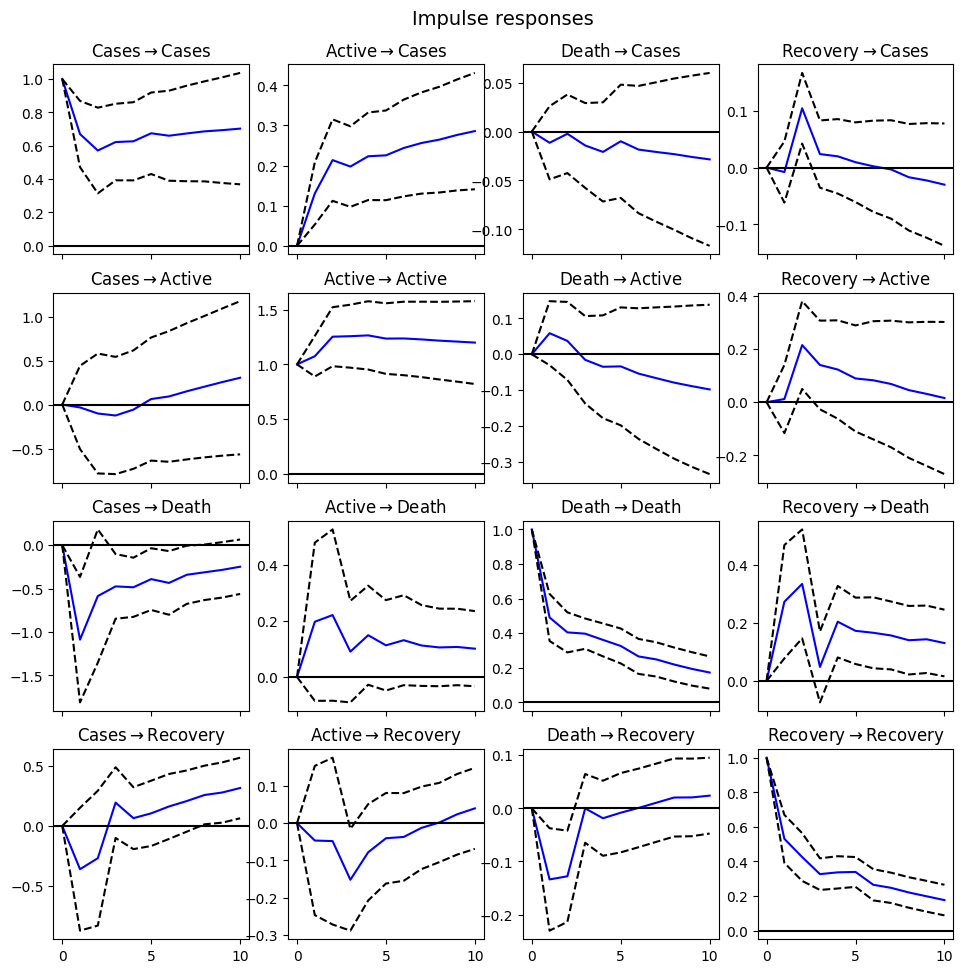

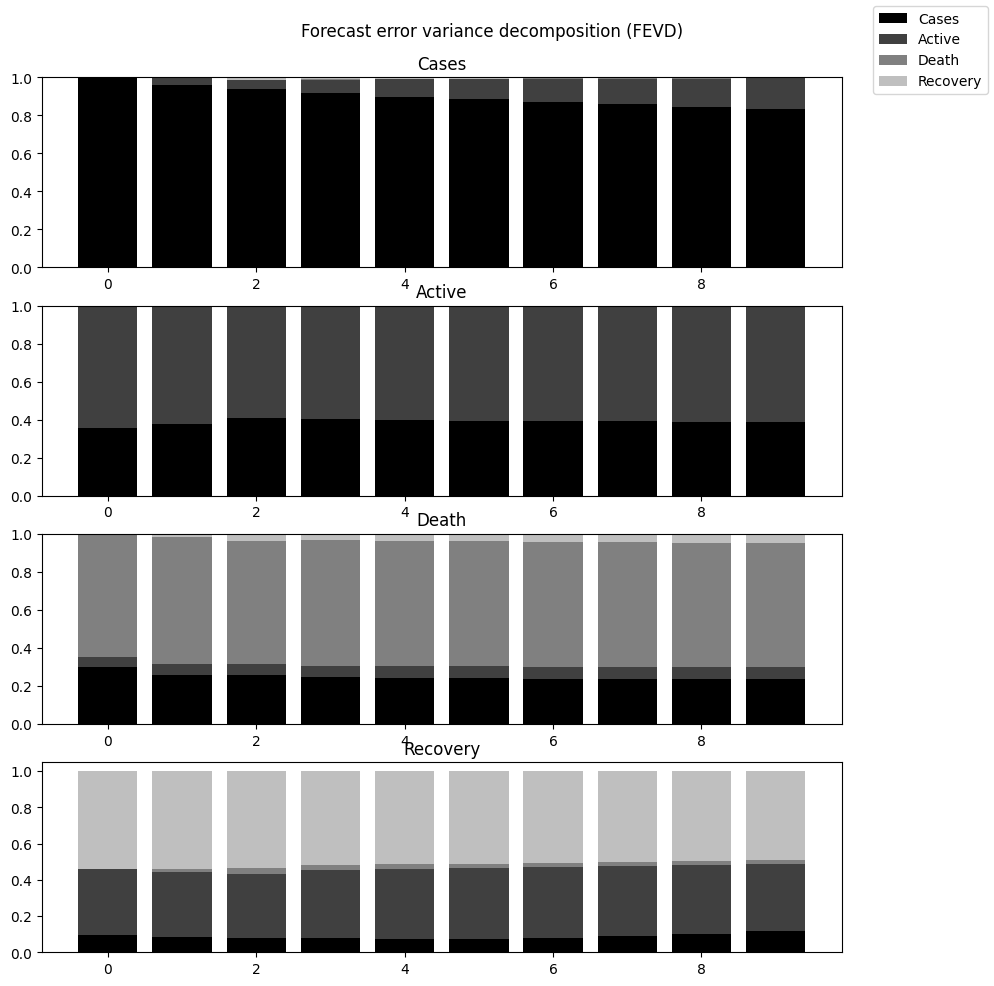

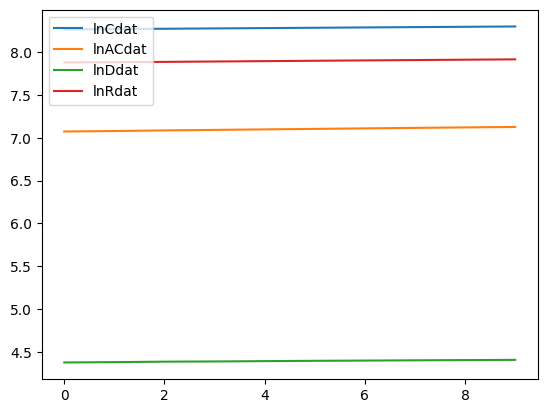

In [35]:
# Declare variables
lnCdat = np.log(Data['Cases'])
lnACdat = np.log(Data['Active'])
lnDdat = np.log(Data['Death'])
lnRdat = np.log(Data['Recovery'])

# A simple graph
plt.scatter(lnCdat, lnACdat)
plt.xlabel('lnCdat')
plt.ylabel('lnACdat')
plt.show()

plt.scatter(lnCdat, lnDdat)
plt.xlabel('lnCdat')
plt.ylabel('lnDdat')
plt.show()

plt.scatter(lnCdat, lnRdat)
plt.xlabel('lnCdat')
plt.ylabel('lnRdat')
plt.show()


# VAR model
data = pd.concat([lnCdat, lnACdat, lnDdat, lnRdat], axis=1)
model = VAR(data)
results = model.fit(maxlags=3, ic='aic')
print(results.summary())

# Determine the Persistence of the Model
plot_acf(lnCdat)
plot_pacf(lnCdat)
plt.show()

plot_acf(lnACdat)
plot_pacf(lnACdat)
plt.show()

plot_acf(lnDdat)
plot_pacf(lnDdat)
plt.show()

plot_acf(lnRdat)
plot_pacf(lnRdat)
plt.show()

# Finding the Optimal lags
# VAR model automatically selects the optimal lag using information criteria

# Diagnosing the VAR

# Normal Distribution of the Residuals
print(normaltest(results.resid))

# Testing for Structural Breaks in the Residuals
breaks_test = breaks_cusumolsresid(results.resid)
print(breaks_test)

# Impulse Response Functions
irf = results.irf(10)
irf.plot(orth=False)
plt.show()

# Variance Decomposition
fevd = results.fevd(10)
fevd.plot()
plt.show()

# VAR Forecasting
forecast = results.forecast(data.values[-results.k_ar:], steps=10)
plt.plot(forecast)
plt.legend(['lnCdat', 'lnACdat', 'lnDdat', 'lnRdat'], loc='upper left')
plt.show()


In [32]:
# Diagnosing the VAR
# Serial Correlation
print(acorr_ljungbox(results.resid.iloc[:, 0]))  # Assuming the first column contains the residuals

      lb_stat  lb_pvalue
1    0.006105   0.937723
2    0.355035   0.837346
3    1.763283   0.622957
4    6.684556   0.153527
5    7.805753   0.167271
6    7.829325   0.250876
7    8.251529   0.310938
8    8.568966   0.379950
9   14.366349   0.109877
10  25.388257   0.004656


In [33]:
# Heteroscedasticity
print(het_arch(results.resid.iloc[:, 0]))  # Assuming the first column contains the residuals


(65.70306580406313, 2.97319033571646e-10, 8.151568177674529, 1.3953619104572665e-11)


In [20]:
from scipy.stats import jarque_bera

# Normal Distribution of the Residuals
print(jarque_bera(results.resid))


SignificanceResult(statistic=223796.4545306822, pvalue=0.0)


In [34]:
# Extract residuals from VAR model results
residuals = results.resid

# Testing for Structural Breaks in the Residuals
print(breaks_cusumolsresid(residuals))


(0.8579050857129844, 0.45338969031639137, [(1, 1.63), (5, 1.36), (10, 1.22)])
